In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pImpactR as impact

In [2]:
EmitStr = ['7','14','28']
tunex = 0.59653003
maxTurn = 10
_x = 0
_xSTR = 'X'
n_particles = 32000

In [3]:
Me = impact.util.Me
ke = 100*1.0e6
energy = ke+Me
freq = 30*1.0e6
offset = 0.001

g = energy/Me
bg = np.sqrt(g**2-1.0)

Emit  = [float(emit)*1.0e-9 for emit in EmitStr]
EmitN = [float(emit)*bg*1.0e-9 for emit in EmitStr]

In [4]:
NL_t = 0.4
NL_c = 0.01
NL_L = 1.8
NL_mu = 0.3
alfx = np.tan(np.pi*NL_mu)
betx = NL_L/np.sin(2.0*np.pi*NL_mu)

In [5]:
X=[]
nMax=[]
i=0
for i in range(len(EmitStr)):
    nMax.append(int(maxTurn/np.sqrt(EmitN[i])))
    X.append(np.real(np.load(_xSTR+'.mid.emit'+EmitStr[i]+'nm.npy'))[:nMax[i]])
    i=i+1

# Find maxoffset position

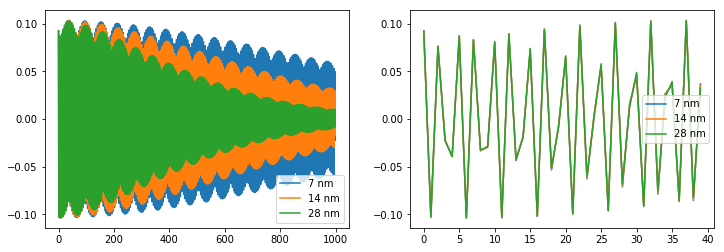

In [6]:
legend = [emit + ' nm' for emit in EmitStr]
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
for i in range(len(Emit)):
    plt.plot(X[i][:1000])
plt.legend(legend)
plt.subplot(1,2,2)
for i in range(len(Emit)):
    plt.plot(X[i][:40])
plt.legend(legend)

In [7]:
for i in range(len(Emit)):
    iMin=np.argmin(X[i][:100])
    print(iMin)

6
6
6


In [8]:
N=[]
for i in range(len(Emit)):
    X[i] = X[i][iMin:]
    X[i] = X[i]/X[i][0]
    N.append(np.arange(len(X[i]))*np.sqrt(EmitN[i]))

In [9]:
fftX = []
Tune = []
for i in range(len(EmitStr)):
    fftX.append(np.fft.fft(X[i]))
    Tune.append(np.linspace(0,1-1.0/len(X[i]),len(X[i])))

# Raw Data

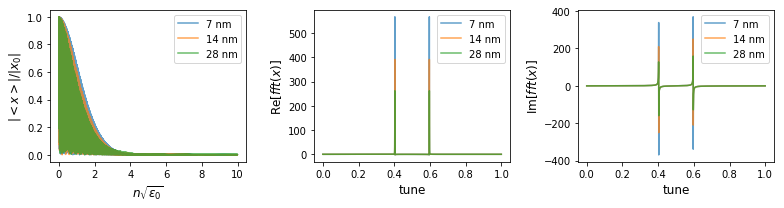

In [10]:
plt.figure(figsize=(11,3))
plt.subplot(1,3,1)
for i in range(len(Emit)):
    plt.plot(N[i],np.abs(X[i])/np.abs(X[i][0]),alpha=0.7)
plt.xlabel(r'$n\sqrt{\epsilon_0}$',fontsize=12);
plt.ylabel(r'$|< x >| / |x_0|$',fontsize=12);
plt.legend(legend)

plt.subplot(1,3,2)
for i in range(len(EmitStr)):
    plt.plot(Tune[i],np.real(fftX[i]),alpha=0.7)
plt.xlabel('tune',fontsize=12);
plt.ylabel(r'Re$\left[fft\left( x \right)\right]$',fontsize=12);
plt.legend(legend)

plt.subplot(1,3,3)
for i in range(len(EmitStr)):
    plt.plot(Tune[i],np.imag(fftX[i]),alpha=0.7)
plt.xlabel('tune',fontsize=12);
plt.ylabel(r'Im$\left[fft\left( x \right)\right]$',fontsize=12);
plt.legend(legend)

plt.tight_layout()
plt.savefig('Centroid.fft.mid.png',dpi=180,bbox_inches = "tight")

# dft zoom

In [11]:
nSample = 1024
Tune= []
Amp = []
for i in range(len(Emit)):
    Tune.append(tunex + np.linspace(-20.0,20.0,nSample)*np.sqrt(float(Emit[i])))
    Amp.append(np.zeros(nSample,dtype=np.complex128))
    n=len(X[i])
    for k in range(nSample):
        Amp[i][k] = np.sum(X[i]*np.exp(-1j*2.0*np.pi*Tune[i][k]*np.arange(0,n)))#+1j*0.15))
    Amp[i] = Amp[i]*np.sqrt(float(Emit[i]))*n_particles

pDataInit = impact.readParticleData(-111114,ke,Me,freq)
# pDataInit[:,_x+1] = pDataInit[:,_x]*alfx/np.sqrt(betx)/NL_c + pDataInit[:,_x+1]*np.sqrt(betx)/NL_c
# pDataInit[:,_x  ] = pDataInit[:,_x]/np.sqrt(betx)/NL_c

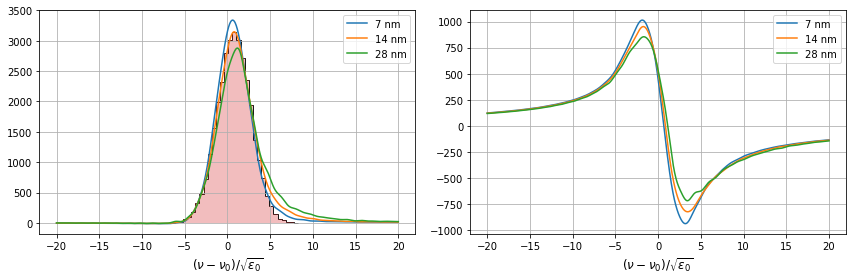

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
for i in range(len(Emit)):
    plt.plot(np.linspace(-20.0,20.0,nSample),np.real(Amp[i])*2.05e0)
plt.hist((pDataInit[:,_x]-offset+0.000065)*1.2e4,bins=32,alpha=0.9,histtype ='step',color='k');
plt.hist((pDataInit[:,_x]-offset+0.000065)*1.2e4,bins=32,alpha=0.3,histtype ='bar');
plt.xlabel(r'$(\nu-\nu_0)/\sqrt{\epsilon_0}$',fontsize=12);
plt.legend(legend)
plt.grid()
plt.subplot(1,2,2)
for i in range(len(Emit)):
    plt.plot(np.linspace(-20.0,20.0,nSample),np.imag(Amp[i]))
plt.xlabel(r'$(\nu-\nu_0)/\sqrt{\epsilon_0}$',fontsize=12);
plt.legend(legend)
plt.grid()
plt.tight_layout()
plt.savefig('dft.mid.v0.png',dpi=180,bbox_inches = "tight")